In [1]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [2]:
common_config.figure_journal_basic()

In [3]:
import pertpy as pt
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
adata = sc.read_h5ad("data/mcfarland_preprocessed.h5ad")

In [5]:
cl_metadata = pt.md.CellLine()
cl_metadata.annotate(
    adata,
    query_id="DepMap_ID",
    reference_id="ModelID",
    fetch=["CellLineName", "Age", "OncotreePrimaryDisease", "SangerModelID"],
)

AnnData object with n_obs × n_vars = 182875 × 4000
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'CellLineName', 'Age', 'OncotreePrimaryDisease', 'SangerModelID'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_line_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'perturbation_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata.obs["CellLineName"].nunique()

209

In [6]:
adata.obs["cell_line"].nunique()

209

In [8]:
sc.pl.umap(adata, color=["OncotreePrimaryDisease"], show=False)
plt.savefig("figures/mcfarland_umap_oncotree_metadata.png", bbox_inches="tight")

In [33]:
moa_metadata = pt.md.Moa()
moa_metadata.annotate(
    adata,
    query_id="perturbation",
)

assert adata.obs[adata.obs["perturbation"] == "control"]["moa"].isna().all()
adata.obs["moa"] = ["Control" if pert == "control" else moa for moa, pert in zip(adata.obs["moa"], adata.obs["perturbation"])]
adata.obs["target"] = ["Control" if pert == "control" else target for target, pert in zip(adata.obs["target"], adata.obs["perturbation"])]

adata

💡 There are 18 identifiers in `adata.obs`.However, 9 identifiers can't be found in the moa annotation,leading to the presence of NA values for their respective metadata.
Please check again: *unmatched_identifiers[:verbosity]...


AnnData object with n_obs × n_vars = 182875 × 4000
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'CellLineName', 'Age', 'OncotreePrimaryDisease', 'SangerModelID', 'pubchem_name', 'pubchem_ID', 'smiles', 'moa', 'target', 'moa_fromMeta', 'target_fromMeta', 'moa_fromMeta', 'target_fromMeta', 'moa_fromMeta', 'target_fromMeta', 'moa_fromMeta', 'target_fromMeta'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_line_colors', 'hvg', 'log1p'

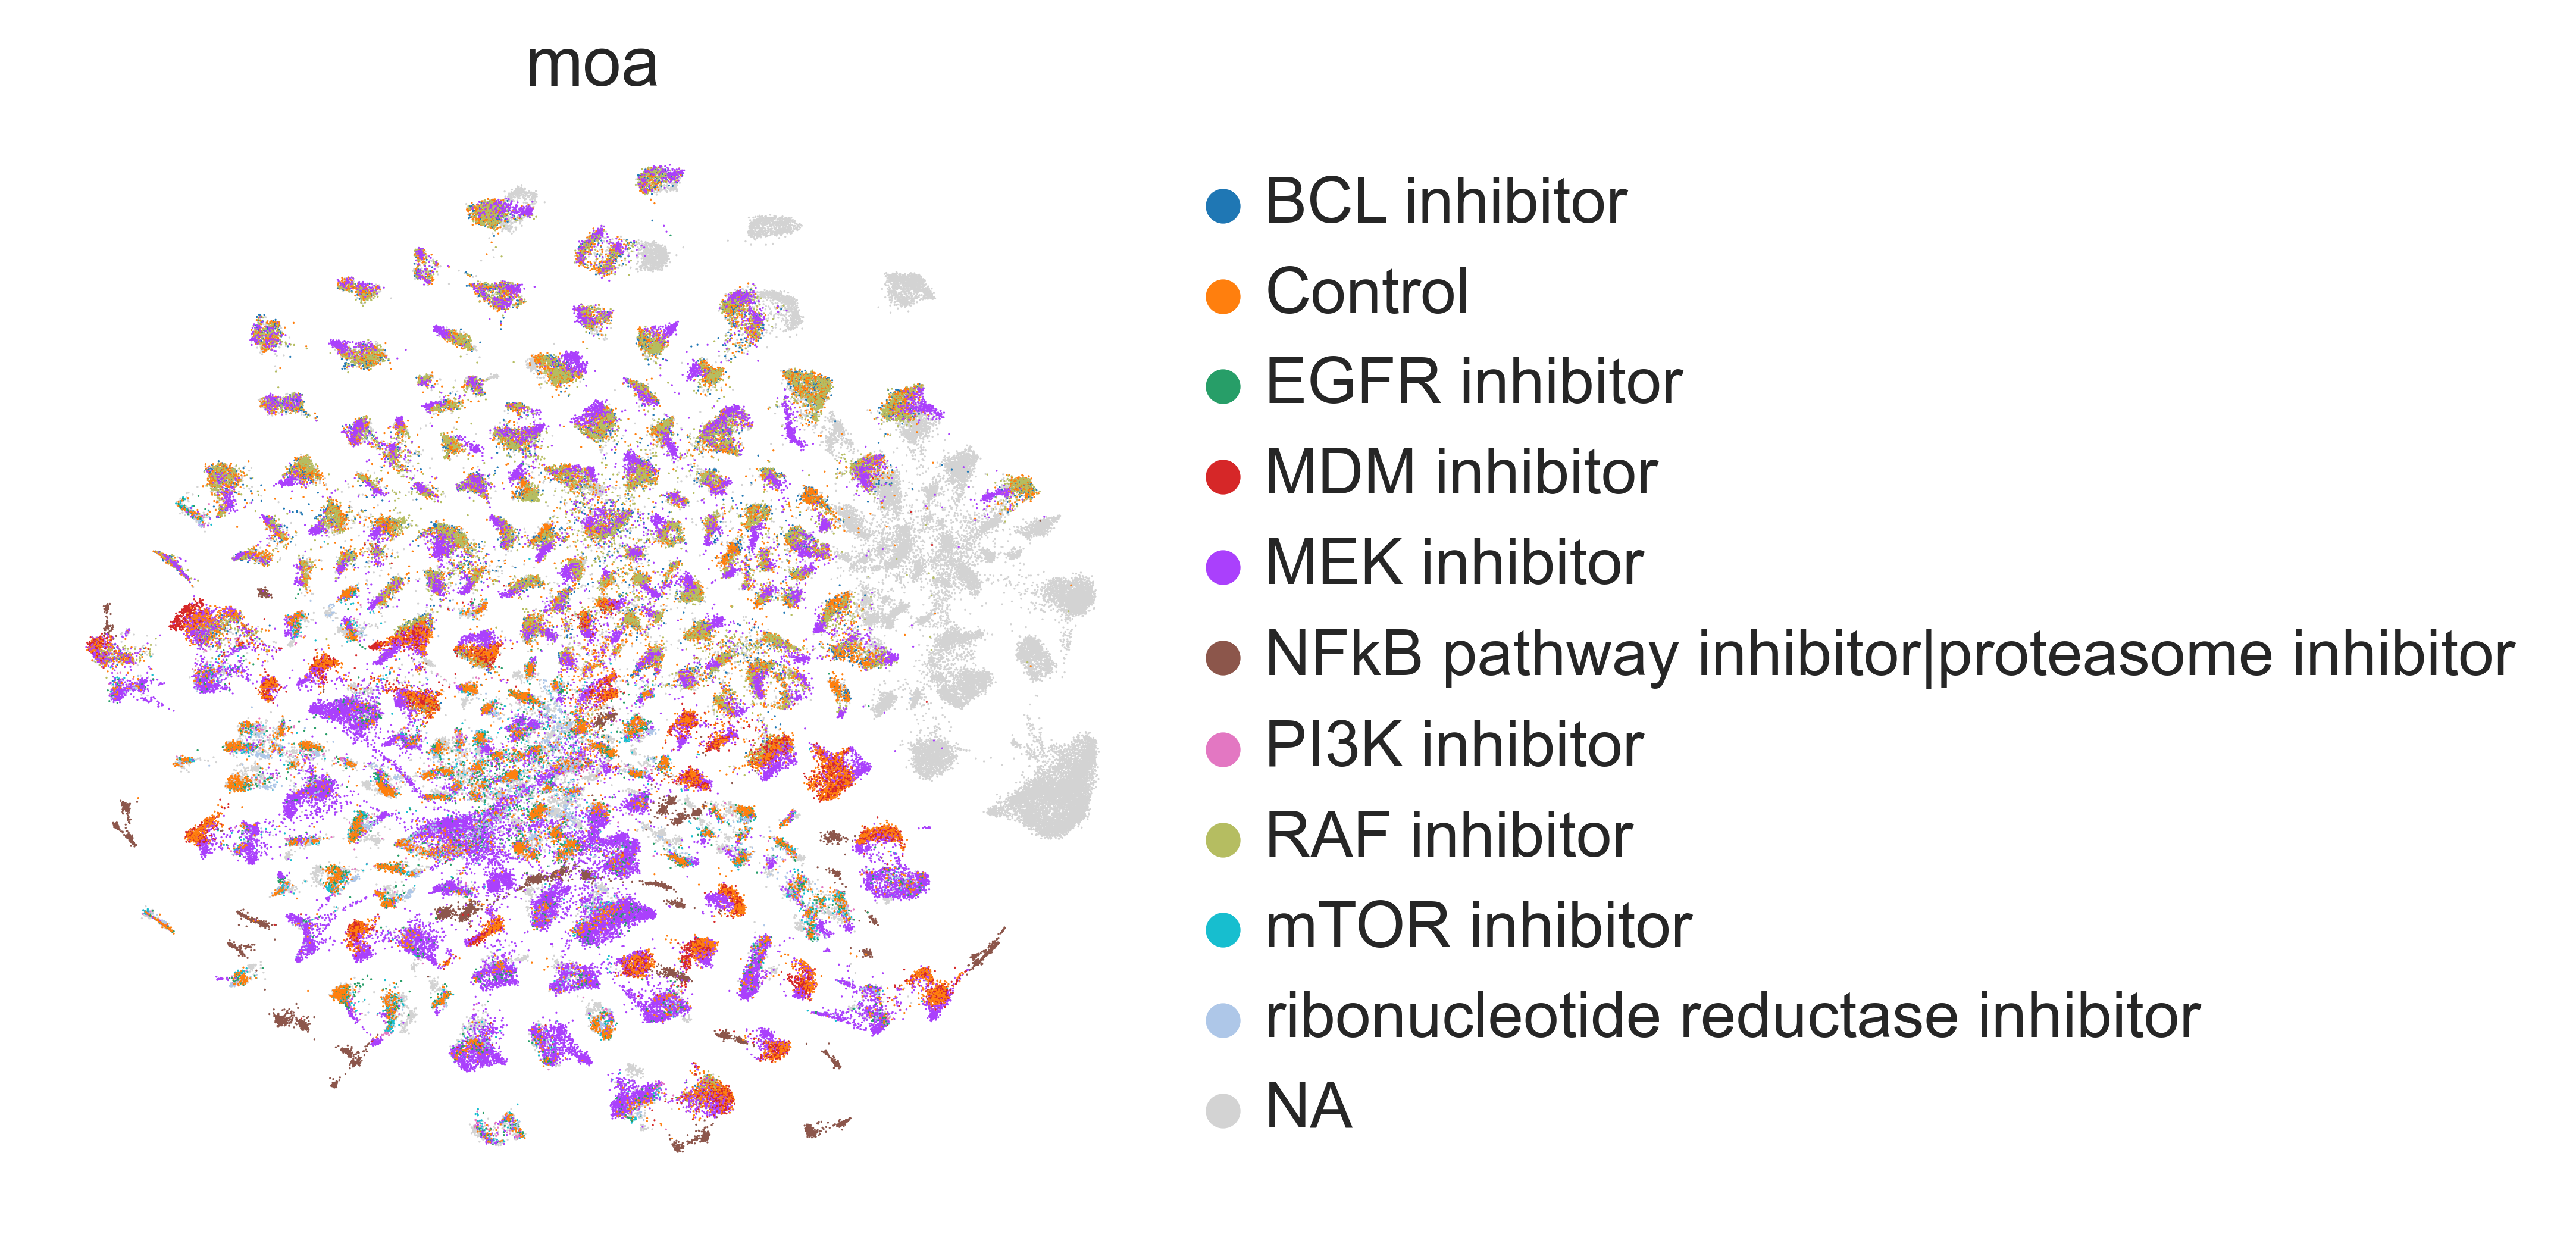

In [34]:
sc.pl.umap(adata, color=["moa"], show=False)
plt.savefig("figures/mcfarland_umap_moa_metadata.png", bbox_inches="tight")

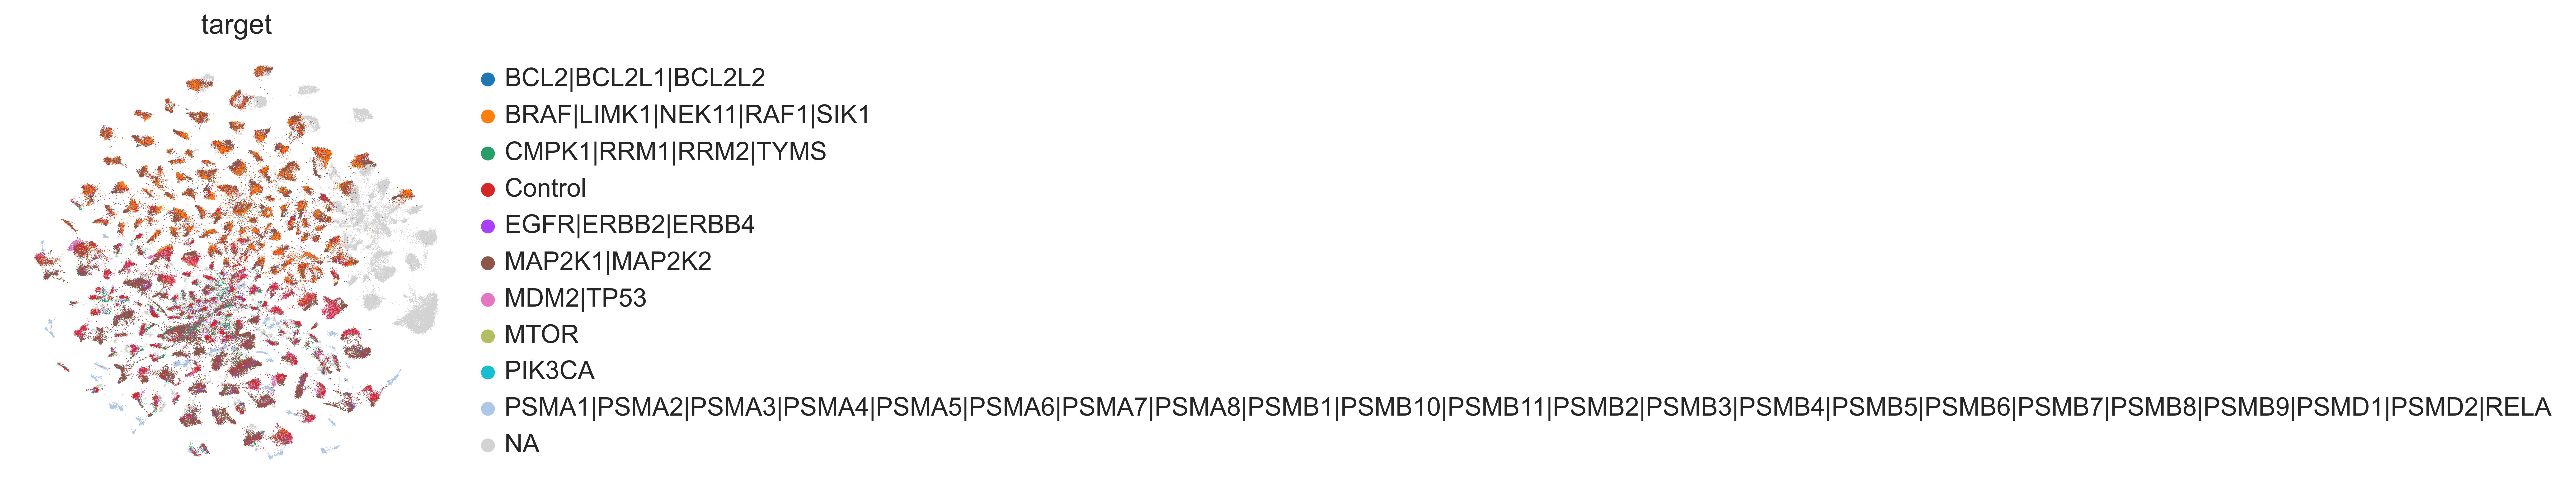

In [35]:
sc.pl.umap(adata, color=["target"], show=False)
plt.savefig("figures/mcfarland_umap_target_metadata.png", bbox_inches="tight")